# Codigo

In [8]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

general=pd.read_csv("basefinalM.csv")



N=general.replace({"DIAMOND I":1,"DIAMOND II":1,"DIAMOND III":1,"DIAMOND IV":1,
                  "PLATINUM I":2,"PLATINUM II":2,"PLATINUM III":2,"PLATINUM IV":2,
                  "GOLD I":3,"GOLD II":3,"GOLD III":3,"GOLD IV":3,
                  "SILVER I":4,"SILVER II":4,"SILVER III":4,"SILVER IV":4,
                  "BRONZE I":5,"BRONZE II":5,"BRONZE III":5,"BRONZE IV":5,
                  "IRON I":10,"IRON II":10,"IRON III":10,"IRON IV":10,
                  "unrancked":6,
                  "GRANDMASTER I":7,
                  "MASTER I":8,
                  "CHALLENGER I":9,

                  })

N

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,elo,championName,win,kills,assists,deaths,individualPosition,...,damageDealtToBuildings,damageDealtToObjectives,detectorWardsPlaced,inhibitorTakedowns,neutralMinionsKilled,wardsKilled,wardsPlaced,visionScore,summoner2Id,summoner1Id
0,0,0.0,0,1,1,True,3.0,6.0,5.0,0,...,4010.0,17599.0,1.0,1.0,4.0,8.0,9.0,26.0,12,4
1,1,1.0,1,1,0,True,1.0,12.0,3.0,0,...,775.0,19359.0,4.0,1.0,128.0,12.0,4.0,61.0,4,11
2,2,2.0,2,2,0,True,9.0,7.0,5.0,0,...,3510.0,8377.0,0.0,1.0,4.0,6.0,9.0,18.0,4,12
3,3,3.0,3,1,0,True,9.0,4.0,4.0,0,...,11702.0,19619.0,4.0,1.0,20.0,10.0,11.0,34.0,7,4
4,4,4.0,4,1,0,True,1.0,15.0,2.0,0,...,486.0,1611.0,3.0,1.0,0.0,8.0,23.0,43.0,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28924,28924,14459.0,1569,6,0,True,8.0,12.0,6.0,0,...,2326.0,3954.0,0.0,0.0,6.0,2.0,4.0,10.0,4,7
28925,28925,14460.0,1570,6,0,True,7.0,6.0,4.0,0,...,2969.0,4964.0,0.0,0.0,0.0,0.0,7.0,11.0,7,14
28926,28926,14461.0,1571,6,0,True,4.0,3.0,3.0,0,...,2660.0,6525.0,0.0,0.0,4.0,0.0,6.0,6.0,7,12
28927,28927,14462.0,1572,6,0,True,4.0,1.0,3.0,0,...,601.0,28349.0,0.0,0.0,116.0,0.0,5.0,8.0,4,11


In [9]:
from sklearn.model_selection import train_test_split

x=N[["kills","assists","deaths","totalMinionsKilled","goldEarned","dragonKills",
         "totalDamageDealtToChampions","totalDamageTaken","turretTakedowns","baronKills",
         "damageDealtToBuildings","damageDealtToObjectives","detectorWardsPlaced","inhibitorTakedowns","neutralMinionsKilled",
         "wardsKilled","wardsPlaced","visionScore"]].values
y = N[["elo"]].values
 
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, 
                                                   test_size=0.9, random_state=0)

In [11]:
# Estandarizar escalas 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [12]:
# llevar el algoritmo  

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, 
                                  metric="minkowski",
                                   p=2)

classifier.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(classifier.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(classifier.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of K-NN classifier on training set: 0.45
Accuracy of K-NN classifier on test set: 0.21


In [13]:
# Hacer la prediccion  

y_pred = classifier.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[   0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1600,  737,  826,  467,  240,  102,   16,  101,    0,   17],
       [   0, 1248,  844,  826,  518,  246,   77,   10,   80,    0,   11],
       [   0, 1436,  924, 1263,  640,  450,  142,    6,   96,    0,   55],
       [   0, 1121,  674,  965,  773,  445,  110,    0,   61,    0,   66],
       [   0,  844,  681,  808,  603,  652,  159,    2,   52,    0,  110],
       [   0,  478,  323,  385,  233,  237,  110,    6,   34,    0,   51],
       [   0,  117,   57,   58,   26,   19,    6,    3,   11,    0,    1],
       [   0,  554,  273,  269,  169,   79,   35,    4,   58,    0,    6],
       [   0,   48,   28,    9,   10,    9,    5,    0,    3,    0,    0],
       [   0,  218,  201,  222,  222,  208,   89,    0,   17,    0,   41]])

In [15]:
pred = classifier.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[   0    1    0    0    0    0    0    0    0    0    0]
 [   0 1600  737  826  467  240  102   16  101    0   17]
 [   0 1248  844  826  518  246   77   10   80    0   11]
 [   0 1436  924 1263  640  450  142    6   96    0   55]
 [   0 1121  674  965  773  445  110    0   61    0   66]
 [   0  844  681  808  603  652  159    2   52    0  110]
 [   0  478  323  385  233  237  110    6   34    0   51]
 [   0  117   57   58   26   19    6    3   11    0    1]
 [   0  554  273  269  169   79   35    4   58    0    6]
 [   0   48   28    9   10    9    5    0    3    0    0]
 [   0  218  201  222  222  208   89    0   17    0   41]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.21      0.39      0.27      4106
           2       0.18      0.22      0.20      3860
           3       0.22      0.25      0.24      5012
           4       0.21      0.18      0.20      4215
           5       0.25      0.17   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.metrics import precision_score
presicion = precision_score(y_test, y_pred,average="micro")

print(presicion)

0.20524638015132313


# Codigo grafica

In [17]:
Datos2=pd.read_csv("basefinalArreglada.csv")

In [18]:
TOP=Datos2.loc[Datos2["individualPosition"]=="TOP"]
TOP=TOP.replace({"DIAMOND I":"DIAMOND","DIAMOND II":"DIAMOND","DIAMOND III":"DIAMOND","DIAMOND IV":"DIAMOND",
                  "PLATINUM I":"PLATINUM","PLATINUM II":"PLATINUM","PLATINUM III":"PLATINUM","PLATINUM IV":"PLATINUM",
                  "GOLD I":"GOLD","GOLD II":"GOLD","GOLD III":"GOLD","GOLD IV":"GOLD",
                  "SILVER I":"SILVER","SILVER II":"SILVER","SILVER III":"SILVER","SILVER IV":"SILVER",
                  "BRONZE I":"BRONZE","BRONZE II":"BRONZE","BRONZE III":"BRONZE","BRONZE IV":"BRONZE",
                  "IRON I":"IRON","IRON II":"IRON","IRON III":"IRON","IRON IV":"IRON"
                  

                  })

In [19]:
from sklearn.model_selection import train_test_split

x=TOP[["kills","assists","deaths","totalMinionsKilled","goldEarned","dragonKills",
         "totalDamageDealtToChampions","totalDamageTaken","turretTakedowns","baronKills",
         "damageDealtToBuildings","damageDealtToObjectives","detectorWardsPlaced","inhibitorTakedowns","neutralMinionsKilled",
         "wardsKilled","wardsPlaced","visionScore"]].values
y = TOP[["elo"]].values
 
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, 
                                                   test_size=0.9, random_state=0)

In [21]:
# Estandarizar escalas 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [22]:
# llevar el algoritmo  

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, 
                                  metric="minkowski",
                                   p=2)

classifier.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(classifier.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(classifier.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of K-NN classifier on training set: 0.42
Accuracy of K-NN classifier on test set: 0.20


In [23]:
# Hacer la prediccion  

y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
Matriz = confusion_matrix(y_test, y_pred)
Matriz

array([[315,   2, 169, 128,   5,  15,   7,  53,  64,  34],
       [  4,   0,   6,   4,   0,   0,   0,   2,   0,   0],
       [155,   0, 276, 184,  16,   8,   6,  83,  59,  27],
       [202,   0, 285, 299,   6,  10,  21,  96,  88,  19],
       [ 18,   0,  22,  10,   0,   0,   0,   6,   5,   0],
       [ 82,   0,  47,  32,   1,   9,   0,  13,  21,   7],
       [ 64,   0,  95,  65,   0,   0,   3,  38,  35,   2],
       [157,   2, 253, 178,   8,   4,  15,  88,  52,  11],
       [195,   0, 199, 200,   8,  10,  14,  87,  49,  25],
       [110,   0, 102,  95,   2,   2,   4,  25,  20,  14]])

In [110]:
from sklearn.metrics import precision_score
presicion = precision_score(y_test, y_pred,average="micro")

print(presicion)

0.20438664596273293


# Grafica TOP

In [25]:
from string import ascii_uppercase
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columnas=["%s" %(i) for i in list(TOP["elo"].value_counts().keys().tolist())[0:10]]

df_cm=pd.DataFrame(Matriz,index=columnas,columns=columnas)

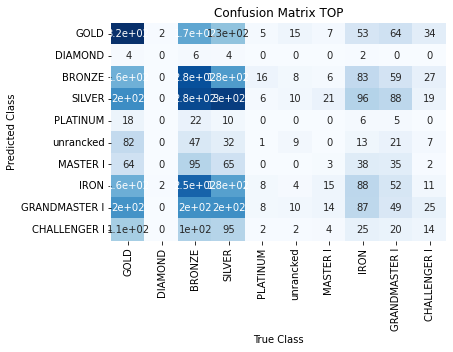

In [26]:
grafica = sns.heatmap(df_cm,cbar=None,cmap="Blues",annot=True)

plt.ylabel("valores verdaderos")
plt.xlabel("predicciones")
plt.title("Confusion Matrix TOP")
grafica.set(xlabel="True Class",ylabel="Predicted Class")
plt.show()

# Grafica UTILITY 

In [27]:
UTILITY=Datos2.loc[Datos2["individualPosition"]=="UTILITY"]
UTILITY=UTILITY.replace({"DIAMOND I":"DIAMOND","DIAMOND II":"DIAMOND","DIAMOND III":"DIAMOND","DIAMOND IV":"DIAMOND",
                  "PLATINUM I":"PLATINUM","PLATINUM II":"PLATINUM","PLATINUM III":"PLATINUM","PLATINUM IV":"PLATINUM",
                  "GOLD I":"GOLD","GOLD II":"GOLD","GOLD III":"GOLD","GOLD IV":"GOLD",
                  "SILVER I":"SILVER","SILVER II":"SILVER","SILVER III":"SILVER","SILVER IV":"SILVER",
                  "BRONZE I":"BRONZE","BRONZE II":"BRONZE","BRONZE III":"BRONZE","BRONZE IV":"BRONZE",
                  "IRON I":"IRON","IRON II":"IRON","IRON III":"IRON","IRON IV":"IRON"
                  

                  })



from sklearn.model_selection import train_test_split

x=UTILITY[["kills","assists","deaths","totalMinionsKilled","goldEarned","dragonKills",
         "totalDamageDealtToChampions","totalDamageTaken","turretTakedowns","baronKills",
         "damageDealtToBuildings","damageDealtToObjectives","detectorWardsPlaced","inhibitorTakedowns","neutralMinionsKilled",
         "wardsKilled","wardsPlaced","visionScore"]].values
y = UTILITY[["elo"]].values
 
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, 
                                                   test_size=0.9, random_state=0)




# Estandarizar escalas 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)




# llevar el algoritmo  

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, 
                                  metric="minkowski",
                                   p=2)

classifier.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(classifier.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(classifier.score(X_test, y_test)))




# Hacer la prediccion  

y_pred = classifier.predict(X_test)


from sklearn.metrics import confusion_matrix
Matriz = confusion_matrix(y_test, y_pred)
Matriz


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of K-NN classifier on training set: 0.48
Accuracy of K-NN classifier on test set: 0.21


array([[352,   4,  83, 165,   4,  13,  12,  43,  88,  33],
       [  4,   2,   5,   4,   0,   0,   2,   2,   0,   2],
       [133,  24, 275, 120,   1,  12,  42,  56,  58,  41],
       [306,  15, 165, 257,   0,  17,  29,  91, 101,  57],
       [ 17,   0,  27,   2,   0,   1,   6,   8,   4,   4],
       [118,   0,  21,  28,   0,   6,   0,  15,  21,  10],
       [ 39,  12, 106,  54,   0,   4,  25,  22,  12,  14],
       [166,   9, 177, 169,   0,  11,  26,  61,  57,  24],
       [302,  12,  96, 202,   0,  14,  19,  72, 105,  42],
       [132,   6,  68,  98,   0,   8,  15,  29,  42,  28]])

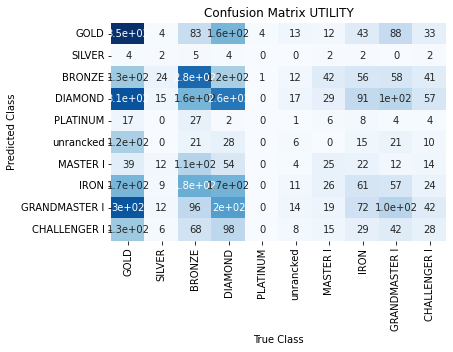

In [28]:
from string import ascii_uppercase
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columnas=["%s" %(i) for i in list(UTILITY["elo"].value_counts().keys().tolist())[0:10]]

df_cm=pd.DataFrame(Matriz,index=columnas,columns=columnas)



grafica = sns.heatmap(df_cm,cbar=None,cmap="Blues",annot=True)

plt.ylabel("valores verdaderos")
plt.xlabel("predicciones")
plt.title("Confusion Matrix UTILITY")
grafica.set(xlabel="True Class",ylabel="Predicted Class")
plt.show()

# Grafica JUNGLE

In [29]:
JUNGLE=Datos2.loc[Datos2["individualPosition"]=="JUNGLE"]
JUNGLE=JUNGLE.replace({"DIAMOND I":"DIAMOND","DIAMOND II":"DIAMOND","DIAMOND III":"DIAMOND","DIAMOND IV":"DIAMOND",
                  "PLATINUM I":"PLATINUM","PLATINUM II":"PLATINUM","PLATINUM III":"PLATINUM","PLATINUM IV":"PLATINUM",
                  "GOLD I":"GOLD","GOLD II":"GOLD","GOLD III":"GOLD","GOLD IV":"GOLD",
                  "SILVER I":"SILVER","SILVER II":"SILVER","SILVER III":"SILVER","SILVER IV":"SILVER",
                  "BRONZE I":"BRONZE","BRONZE II":"BRONZE","BRONZE III":"BRONZE","BRONZE IV":"BRONZE",
                  "IRON I":"IRON","IRON II":"IRON","IRON III":"IRON","IRON IV":"IRON"
                  

                  })



from sklearn.model_selection import train_test_split

x=JUNGLE[["kills","assists","deaths","totalMinionsKilled","goldEarned","dragonKills",
         "totalDamageDealtToChampions","totalDamageTaken","turretTakedowns","baronKills",
         "damageDealtToBuildings","damageDealtToObjectives","detectorWardsPlaced","inhibitorTakedowns","neutralMinionsKilled",
         "wardsKilled","wardsPlaced","visionScore"]].values
y = JUNGLE[["elo"]].values
 
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, 
                                                   test_size=0.9, random_state=0)




# Estandarizar escalas 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)




# llevar el algoritmo  

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, 
                                  metric="minkowski",
                                   p=2)

classifier.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(classifier.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(classifier.score(X_test, y_test)))




# Hacer la prediccion  

y_pred = classifier.predict(X_test)


from sklearn.metrics import confusion_matrix
Matriz = confusion_matrix(y_test, y_pred)
Matriz

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of K-NN classifier on training set: 0.48
Accuracy of K-NN classifier on test set: 0.23


array([[371,   2,  66, 116,   2,  52,  12, 100,  82,  29],
       [  4,   1,   8,   8,   1,   0,   4,   9,   0,   0],
       [109,   9, 276, 153,   8,  18,  27, 172,  64,  13],
       [246,   2, 171, 191,   6,  33,  25, 150, 119,  37],
       [  8,   0,  34,   4,   1,   2,   0,  11,   1,   0],
       [116,   0,   8,  32,   0,  39,   4,  16,  39,   5],
       [ 39,   0,  55,  57,   7,   3,  20,  64,  23,  10],
       [152,   0, 181, 160,   6,  20,  23, 167,  74,  32],
       [240,   4, 166, 166,   3,  52,  16, 119, 134,  28],
       [ 89,   0,  60,  64,   1,  22,   6,  54,  40,  29]])

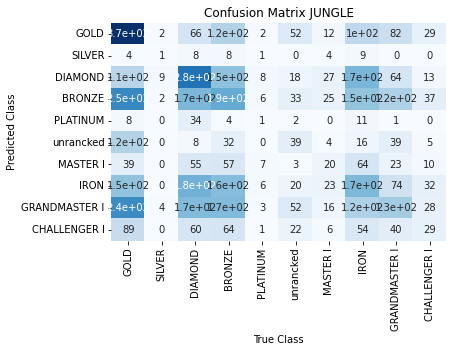

In [30]:
from string import ascii_uppercase
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columnas=["%s" %(i) for i in list(JUNGLE["elo"].value_counts().keys().tolist())[0:10]]

df_cm=pd.DataFrame(Matriz,index=columnas,columns=columnas)



grafica = sns.heatmap(df_cm,cbar=None,cmap="Blues",annot=True)

plt.ylabel("valores verdaderos")
plt.xlabel("predicciones")
plt.title("Confusion Matrix JUNGLE")
grafica.set(xlabel="True Class",ylabel="Predicted Class")
plt.show()

# Grafica MIDDLE

In [31]:
MIDDLE=Datos2.loc[Datos2["individualPosition"]=="MIDDLE"]
MIDDLE=MIDDLE.replace({"DIAMOND I":"DIAMOND","DIAMOND II":"DIAMOND","DIAMOND III":"DIAMOND","DIAMOND IV":"DIAMOND",
                  "PLATINUM I":"PLATINUM","PLATINUM II":"PLATINUM","PLATINUM III":"PLATINUM","PLATINUM IV":"PLATINUM",
                  "GOLD I":"GOLD","GOLD II":"GOLD","GOLD III":"GOLD","GOLD IV":"GOLD",
                  "SILVER I":"SILVER","SILVER II":"SILVER","SILVER III":"SILVER","SILVER IV":"SILVER",
                  "BRONZE I":"BRONZE","BRONZE II":"BRONZE","BRONZE III":"BRONZE","BRONZE IV":"BRONZE",
                  "IRON I":"IRON","IRON II":"IRON","IRON III":"IRON","IRON IV":"IRON"
                  

                  })



from sklearn.model_selection import train_test_split

x=MIDDLE[["kills","assists","deaths","totalMinionsKilled","goldEarned","dragonKills",
         "totalDamageDealtToChampions","totalDamageTaken","turretTakedowns","baronKills",
         "damageDealtToBuildings","damageDealtToObjectives","detectorWardsPlaced","inhibitorTakedowns","neutralMinionsKilled",
         "wardsKilled","wardsPlaced","visionScore"]].values
y = MIDDLE[["elo"]].values
 
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, 
                                                   test_size=0.9, random_state=0)




# Estandarizar escalas 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)




# llevar el algoritmo  

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, 
                                  metric="minkowski",
                                   p=2)

classifier.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(classifier.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(classifier.score(X_test, y_test)))




# Hacer la prediccion  

y_pred = classifier.predict(X_test)


from sklearn.metrics import confusion_matrix
Matriz = confusion_matrix(y_test, y_pred)
Matriz

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of K-NN classifier on training set: 0.47
Accuracy of K-NN classifier on test set: 0.20


array([[248,   0, 113, 119,   0,  27,  21,  80,  81,  12],
       [  0,   0,   7,   4,   0,   0,   4,   4,   2,   2],
       [149,   0, 299, 122,   0,  13,  50, 134,  64,   7],
       [199,   0, 304, 181,   0,  31,  57, 112, 110,  22],
       [ 12,   0,  13,  13,   0,   0,   4,   9,   2,   0],
       [ 90,   0,  35,  34,   0,  10,   5,  17,  37,   4],
       [ 54,   0, 100,  40,   0,   4,  28,  57,  18,   2],
       [155,   0, 198, 115,   0,  12,  30, 142,  98,  10],
       [194,   0, 206, 142,   0,  30,  33, 113,  86,  18],
       [ 86,   2,  96,  77,   0,  20,  11,  41,  27,  19]])

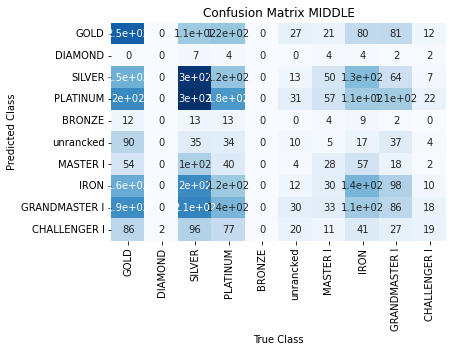

In [32]:
from string import ascii_uppercase
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columnas=["%s" %(i) for i in list(MIDDLE["elo"].value_counts().keys().tolist())[0:10]]

df_cm=pd.DataFrame(Matriz,index=columnas,columns=columnas)



grafica = sns.heatmap(df_cm,cbar=None,cmap="Blues",annot=True)

plt.ylabel("valores verdaderos")
plt.xlabel("predicciones")
plt.title("Confusion Matrix MIDDLE")
grafica.set(xlabel="True Class",ylabel="Predicted Class")
plt.show()

# Grafica BOTTOM

In [33]:
BOTTOM=Datos2.loc[Datos2["individualPosition"]=="BOTTOM"]
BOTTOM=BOTTOM.replace({"DIAMOND I":"DIAMOND","DIAMOND II":"DIAMOND","DIAMOND III":"DIAMOND","DIAMOND IV":"DIAMOND",
                  "PLATINUM I":"PLATINUM","PLATINUM II":"PLATINUM","PLATINUM III":"PLATINUM","PLATINUM IV":"PLATINUM",
                  "GOLD I":"GOLD","GOLD II":"GOLD","GOLD III":"GOLD","GOLD IV":"GOLD",
                  "SILVER I":"SILVER","SILVER II":"SILVER","SILVER III":"SILVER","SILVER IV":"SILVER",
                  "BRONZE I":"BRONZE","BRONZE II":"BRONZE","BRONZE III":"BRONZE","BRONZE IV":"BRONZE",
                  "IRON I":"IRON","IRON II":"IRON","IRON III":"IRON","IRON IV":"IRON"
                  

                  })



from sklearn.model_selection import train_test_split

x=BOTTOM[["kills","assists","deaths","totalMinionsKilled","goldEarned","dragonKills",
         "totalDamageDealtToChampions","totalDamageTaken","turretTakedowns","baronKills",
         "damageDealtToBuildings","damageDealtToObjectives","detectorWardsPlaced","inhibitorTakedowns","neutralMinionsKilled",
         "wardsKilled","wardsPlaced","visionScore"]].values
y = BOTTOM[["elo"]].values
 
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, 
                                                   test_size=0.9, random_state=0)




# Estandarizar escalas 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)




# llevar el algoritmo  

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, 
                                  metric="minkowski",
                                   p=2)

classifier.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(classifier.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(classifier.score(X_test, y_test)))




# Hacer la prediccion  

y_pred = classifier.predict(X_test)


from sklearn.metrics import confusion_matrix
Matriz = confusion_matrix(y_test, y_pred)
Matriz

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of K-NN classifier on training set: 0.42
Accuracy of K-NN classifier on test set: 0.20


array([[244,   0, 114, 114,   0,  62,  14,  42, 106,   6],
       [  0,   0,   6,   2,   0,   0,   4,   4,   0,   0],
       [139,   0, 316, 121,   2,  26,  40,  61, 115,   6],
       [247,   0, 240, 193,   2,  39,  33,  83, 173,   6],
       [  4,   0,  18,   8,   0,   0,   4,   4,  12,   0],
       [ 98,   0,  45,  22,   0,  34,   3,  15,  32,   0],
       [ 37,   0,  99,  40,   0,   0,   8,  43,  34,   2],
       [156,   0, 228, 143,   2,  27,  17, 112, 143,   4],
       [230,   0, 193, 136,   2,  49,  16,  59, 132,   2],
       [101,   0,  60,  55,   0,  10,   5,  35,  55,   0]])

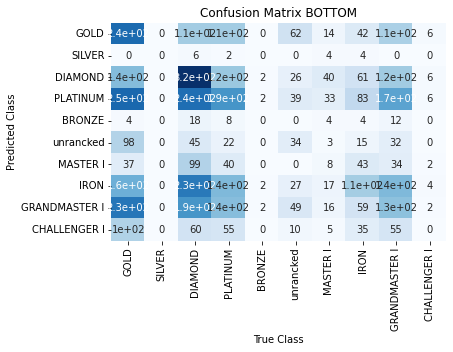

In [35]:
from string import ascii_uppercase
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columnas=["%s" %(i) for i in list(BOTTOM["elo"].value_counts().keys().tolist())[0:10]]

df_cm=pd.DataFrame(Matriz,index=columnas,columns=columnas)



grafica = sns.heatmap(df_cm,cbar=None,cmap="Blues",annot=True)

plt.ylabel("valores verdaderos")
plt.xlabel("predicciones")
plt.title("Confusion Matrix BOTTOM")
grafica.set(xlabel="True Class",ylabel="Predicted Class")
plt.show()